In [1]:
# standard libraries
import pandas as pd
import numpy as np
import os
from IPython.display import Image
#from IPython.display import clear_output
#import sklearn
#import time
#import re

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tabulate import tabulate

# data pre-processing
from sklearn.impute._base import _BaseImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection._split import BaseShuffleSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# prediction models
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score

# import warnings filter
'''import warnings
warnings.filterwarnings('ignore')
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)'''

"import warnings\nwarnings.filterwarnings('ignore')\nfrom warnings import simplefilter \nsimplefilter(action='ignore', category=FutureWarning)"

In [2]:
from os import listdir
from os.path import isfile, join

class FilePathManager:
    def __init__(self, local_dir: str):
        self.local_dir = local_dir
    
    def retrieve_full_path(self):
        return os.getcwd()+'/'+self.local_dir

In [3]:
class Loader:
    df = pd.DataFrame()
    
    #@abstractmethod
    def load_data(self, file_name):
        pass
    
    #@abstractmethod
    def get_df(self):
        pass
    
    def size(self):
        return len(self.df)

In [4]:
from typing import Callable
 
class CSVLoader(Loader):
    def __init__(self, file_path_manager: FilePathManager):
        self.file_path_manager = file_path_manager
        
    def load_data(self, _prepare_data: Callable[[pd.DataFrame], pd.DataFrame] = None):
        self.df = pd.read_csv(self.file_path_manager.retrieve_full_path())
        if _prepare_data:
            self.df = _prepare_data(self.df)
    
    def get_df(self):
        return self.df;
    
    def size(self):
        return len(self.df)  

In [5]:
def clean_data(df):
    df['# label'] = df['# label'].astype(int)
    return df

In [6]:
loader = CSVLoader(FilePathManager('subset_train.csv'))
loader.load_data(clean_data)
df = loader.get_df()

## EDA

In [7]:
df

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,...,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.000000
1,1,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,...,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.000000
2,0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,...,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.000000
3,1,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,...,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.000000
4,0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,...,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,-0.466401,-0.816509,0.994400,1.578208,0.708756,0.850488,0.113271,-1.163853,-0.977725,...,0.278567,-0.261701,-1.064876,1.743123,0.374612,-0.177155,-0.308612,0.048068,0.667413,750.000000
9996,1,-0.743099,-0.801809,0.157093,1.195266,0.693181,-1.054221,0.032518,0.593113,-0.937547,...,0.856601,-0.090448,-0.795003,1.743123,0.057993,-0.464903,-0.342341,-0.390103,0.076044,750.000000
9997,0,-0.830451,-0.009761,-1.240759,0.790862,0.888049,2.755198,0.557374,0.171402,-0.507344,...,0.384287,0.807661,0.058493,-0.573682,0.815063,-0.380386,2.253476,0.693282,-0.011645,499.999969
9998,0,0.154743,-0.982094,0.256075,-0.405385,0.797190,-0.005984,-0.489334,-0.937550,-0.240905,...,-0.357534,-0.529813,1.054345,1.743123,-1.124654,0.114992,-0.334729,-1.329018,-1.074768,1000.000000


In [8]:
df['# label'].value_counts()

1    5006
0    4994
Name: # label, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   # label  10000 non-null  int32  
 1   f0       10000 non-null  float64
 2   f1       10000 non-null  float64
 3   f2       10000 non-null  float64
 4   f3       10000 non-null  float64
 5   f4       10000 non-null  float64
 6   f5       10000 non-null  float64
 7   f6       10000 non-null  float64
 8   f7       10000 non-null  float64
 9   f8       10000 non-null  float64
 10  f9       10000 non-null  float64
 11  f10      10000 non-null  float64
 12  f11      10000 non-null  float64
 13  f12      10000 non-null  float64
 14  f13      10000 non-null  float64
 15  f14      10000 non-null  float64
 16  f15      10000 non-null  float64
 17  f16      10000 non-null  float64
 18  f17      10000 non-null  float64
 19  f18      10000 non-null  float64
 20  f19      10000 non-null  float64
 21  f20      1000

### Scaling and Skew
Need to scale feature 'mass'.  Other features are already scaled or pretty close.

Several features are highly skewed with min or max values > 4 standard devations from the mean

In [10]:
feature_summary = df.iloc[:, 1:29].describe().T
feature_summary

,count,mean,std,min,25%,50%,75%,max
f0,10000.0,-0.005212,0.996135,-1.960128,-0.744392,-0.058791,0.668916,3.531531
f1,10000.0,-0.016246,1.009017,-2.364892,-0.773119,-0.017763,0.720809,2.363972
f2,10000.0,-0.000631,1.000983,-1.730097,-0.864226,0.011842,0.874453,1.732171
f3,10000.0,0.002437,1.006064,-5.910697,-0.611822,0.013453,0.681721,2.714625
f4,10000.0,-0.003107,1.004082,-1.732066,-0.876666,-0.017050,0.867831,1.731901
f5,10000.0,-0.011683,0.996457,-1.054221,-1.054221,-0.005984,0.850488,4.106610
f6,10000.0,0.031500,0.981661,-2.236841,-0.739342,-0.131225,0.777828,3.214819
f7,10000.0,-0.023300,0.992394,-2.755380,-0.722969,-0.032230,0.683058,2.748670
f8,10000.0,-0.002454,0.995867,-1.732045,-0.855039,0.000415,0.852296,1.731020
f9,10000.0,-0.009330,1.002669,-1.325801,-1.325801,0.754261,0.754261,0.754261


#### Higly skewed features

In [11]:
right_skew = feature_summary.loc[feature_summary['max'] > feature_summary['mean'] + feature_summary['std']*4]
left_skew = feature_summary.loc[feature_summary['min'] < feature_summary['mean'] - feature_summary['std']*4]
skew = pd.concat([right_skew.T, left_skew.T], axis=1, join='inner')
skew

,f5,f10,f14,f18,f22,f23,f24,f3,f24
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.011683,0.029123,0.008778,0.004242,0.013602,0.012480,0.005977,0.002437,0.005977
std,0.996457,1.000176,0.997570,1.006650,1.016167,1.005252,1.012633,1.006064,1.012633
min,-1.054221,-2.346174,-2.328305,-1.727789,-3.248565,-2.923690,-5.202552,-5.910697,-5.202552
25%,-1.054221,-0.719427,-0.694531,-0.757036,-0.542222,-0.513710,-0.353028,-0.611822,-0.353028
50%,-0.005984,-0.123990,-0.108612,-0.091258,-0.164916,-0.312082,-0.325690,0.013453,-0.325690
75%,0.850488,0.676677,0.631643,0.627097,0.482105,0.183403,-0.235103,0.681721,-0.235103
max,4.106610,4.181101,5.011833,4.105282,6.189757,7.592020,10.308033,2.714625,10.308033


#### No major outliers, just skewed data

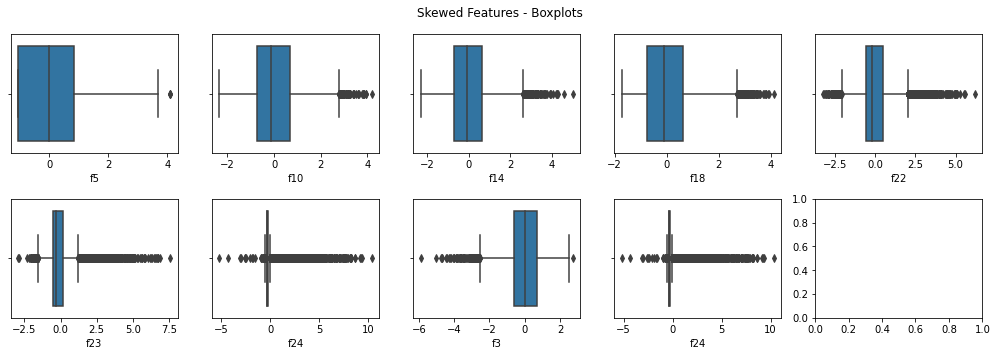

In [12]:
fig, axes = plt.subplots(2, 5, figsize=(14, 5))
fig.suptitle('Skewed Features - Boxplots')
for i,j in zip(skew.columns, range(9)):
    sns.boxplot(ax = axes[int(j/5), j%5], x = df[i])

fig.tight_layout()

## Modeling Prep

In [13]:
class BaseImputer:
    #@abstractmethod
    def fit(self, X, y=None):
        pass
    
    #@abstractmethod
    def transform(self, X):
        pass

class BaseModel:
    #@abstractmethod
    def fit(self, X, y, sample_weight=None):
        pass
    
    #@abstractmethod
    def predict(self, X):
        pass

In [14]:
class Modeling:
    _X_train_fitted = None
    _X_test_fitted = None
    _y_train = None
    _y_test = None
    _y_preds = None
    
    def __init__(self, data: pd.DataFrame, 
                 target_name: str, 
                 shuffle_splitter: BaseShuffleSplit, 
                 imputer: BaseImputer, 
                 model: BaseModel, 
                 scaler = None):
        self._data = data
        self._target_name = target_name
        self._shuffle_splitter = shuffle_splitter
        self._imputer = imputer
        self._model = model
        self._X, self._y = self._split_data()
        self._scaler = scaler
        
    @property
    def X(self):
        return self._X
    
    @property
    def y(self):
        return self._y

    @property
    def model(self):
        return self._model
    
    @model.setter
    def model(self, model):
        self._model = model
     
    @property
    def X_train(self):
        return self._X_train_fitted
    
    @property
    def X_test(self):
        return self._X_test_fitted
    
    @property
    def y_train(self):
        return self._y_train
    
    @property
    def y_test(self):
        return self._y_test
    
    @property
    def y_preds(self):
        return self._y_preds
    
    def _split_data(self):
        X = self._data.copy()
        return X.drop([self._target_name], axis=1) , X[self._target_name]
    
    def _shuffle_split(self):
        X = self.X
        y = self.y
        for train_index, test_index in self._shuffle_splitter.split(X,y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y[train_index], y[test_index]
        return X_train, X_test, y_train, y_test
    
    def _fit_imputer(self, train):
        if self._imputer is not None:
            self._imputer.fit(train)
    
    def _fit_scaler(self, train):
        if self._scaler is not None:
            self._scaler.fit(train)
    
    def _impute_data(self, X: pd.DataFrame):
        if self._imputer is not None:
            return pd.DataFrame(self._imputer.transform(X), columns = self.X.columns, index = X.index)
        return X
    
    def _scale_data(self, X: pd.DataFrame):
        if self._scaler is not None:
            X = pd.DataFrame(self._scaler.transform(X), columns = self._X.columns)
        return X
    
    def prepare(self):
        X_train, X_test, y_train, y_test = self._shuffle_split()   
        self._fit_imputer(X_train)
        X_train = self._impute_data(X_train)
        X_test = self._impute_data(X_test)
        self._fit_scaler(X_train)
        self._X_train_fitted = self._scale_data(X_train)
        self._X_test_fitted = self._scale_data(X_test)
        self._y_train = y_train
        self._y_test = y_test
        
    def prepare_and_train(self):
        self.prepare()
        return self.train()
        
    def train(self, epoch=None, batch=None):
        if epoch is None and batch is None:
            self._model.fit(self.X_train, self.y_train)
            self._y_preds = self._model.predict(self.X_train)
        else:
            self._model.fit(self.X_train, self.y_train, batch_size=batch, epochs=epoch)
            self._y_preds = self._model.predict(self.X_train)
        
        return self.metrics(self.y_train, self.y_preds)
        
    def test(self):
        return self.metrics(self.y_test, self._model.predict(self.X_test))
       
    #@abstractmethod
    def metrics(self, y_true = None, y_pred = None):
        pass

In [15]:
class ClassificationModeling(Modeling):
    def __init__(self, 
                 data: pd.DataFrame, 
                 target_name: str, 
                 shuffle_splitter: BaseShuffleSplit, 
                 imputer: BaseImputer, 
                 model: BaseModel, 
                 scaler = None,
                 beta: int = 1,
                 classification: str = 'binary'):
        super().__init__(data, target_name, shuffle_splitter, imputer, model, scaler)
        self.beta = beta
        self.classification = classification
    
    def metrics(self, y_true = None, y_pred = None):
        if y_true is None and y_pred is None:
            y_true = self.y_train
            y_pred = self.y_preds
        if type(y_pred[0]) is np.int32: # Logistic Reg
            return ({'matrix': confusion_matrix(y_true, y_pred), 
                'accuracy': accuracy_score(y_true, y_pred), 
                'precision': precision_score(y_true, y_pred, average=self.classification), 
                'recall': recall_score(y_true, y_pred, average=self.classification),
                 'f1': f1_score(y_true, y_pred),
                'f{}'.format(self.beta) : fbeta_score(y_true, y_pred, average=self.classification, beta=self.beta) } )
        else: # Tensorflow
            y_pred = pd.Series(y_pred.reshape((y_pred.shape[1], y_pred.shape[0]))[0], index=y_true.index)
            y_pred = pd.Series( (y_pred>0.5).astype(int), index=y_true.index) 
            return ({'matrix': confusion_matrix(y_true, y_pred), 
                'accuracy': accuracy_score(y_true, y_pred), 
                'precision': precision_score(y_true, y_pred, average=self.classification), 
                'recall': recall_score(y_true, y_pred, average=self.classification),
                 'f1': f1_score(y_true, y_pred),
                'f{}'.format(self.beta) : fbeta_score(y_true, y_pred, average=self.classification, beta=self.beta) } )

## Baseline Model - Logistic Regression

In [16]:
baseline = ClassificationModeling(df,'# label',
                           StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=12343),
                           None,
                           LogisticRegression(penalty='l1', solver='saga', random_state=12343),
                           StandardScaler(), beta=2)

baseline.prepare()

In [17]:
baseline_results = pd.DataFrame()

for i in [0.001, .005, 0.01, 0.05, 0.06, 0.07, 0.1, 1, 10, 100, 500]:
    baseline.model.C = i
    baseline_results = baseline_results.append({"C": i,
                                               "Train Accuracy": round( baseline.train()['accuracy'], 4),
                                               "Test Accuracy": round( baseline.test()['accuracy'], 4)},
                                              ignore_index=True)

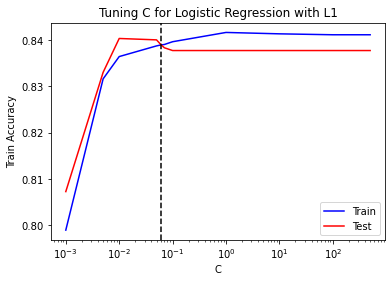

In [18]:
sns.lineplot(data=baseline_results, x='C', y='Train Accuracy', color='blue')
sns.lineplot(data=baseline_results, x='C', y='Test Accuracy', color='red')
plt.title('Tuning C for Logistic Regression with L1')
plt.legend(['Train', 'Test'])
plt.xscale('log')
plt.axvline(0.06, color='black', ls='--')
plt.show()

In [20]:
baseline.model.C = 0.06
baseline.prepare()
baseline.train(epoch=None, batch=None)

{'matrix': array([[2930,  566],
        [ 562, 2942]], dtype=int64),
 'accuracy': 0.8388571428571429,
 'precision': 0.838654503990878,
 'recall': 0.8396118721461188,
 'f1': 0.8391329150028523,
 'f2': 0.8394202236932207}

In [21]:
baseline.test()

{'matrix': array([[1260,  238],
        [ 245, 1257]], dtype=int64),
 'accuracy': 0.839,
 'precision': 0.8408026755852843,
 'recall': 0.8368841544607191,
 'f1': 0.8388388388388388,
 'f2': 0.8376649340263895}

### Feature Importance with L1 Regularization

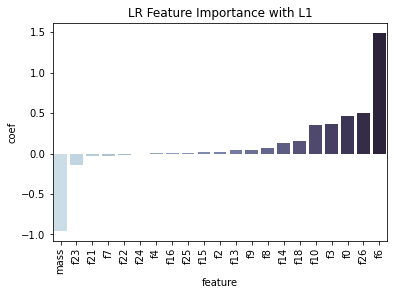

In [22]:
feat_coef = []
feat = zip(baseline.X_train.columns, baseline.model.coef_[0])
[feat_coef.append([i,j]) for i,j in feat]
feat_coef = pd.DataFrame(feat_coef, columns = ['feature','coef'])
top_feat_baseline = feat_coef.loc[abs(feat_coef['coef'])>0].sort_values(by='coef')

feat_plot = sns.barplot(data=top_feat_baseline, x='feature', y='coef', palette = "ch:s=.25,rot=-.25")
plt.xticks(rotation=90)
plt.title('LR Feature Importance with L1')
plt.show()

### Eliminated Features from L1 Regularization

In [23]:
list( feat_coef.loc[feat_coef['coef']==0, 'feature'] )

['f1', 'f5', 'f11', 'f12', 'f17', 'f19', 'f20']

#### See if ElasticNet helps with overfitting  features 'mass' and 'f6'

In [24]:
baseline.model = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, C=0.065, solver='saga', random_state=12343)
print( 'ElasticNet Training Accuracy =', round( baseline.prepare_and_train()['accuracy'], 4) )
print( 'ElasticNet Test Accuracy =', round( baseline.test()['accuracy'], 4) )

ElasticNet Training Accuracy = 0.839
ElasticNet Test Accuracy = 0.839


#### Features 'mass' and 'f6' are most important even with some L2 regularization

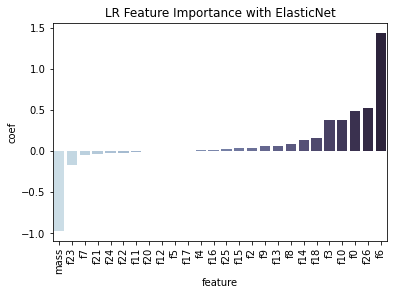

In [25]:
feat_coef = []
feat = zip(baseline.X_train.columns, baseline.model.coef_[0])
[feat_coef.append([i,j]) for i,j in feat]
feat_coef = pd.DataFrame(feat_coef, columns = ['feature','coef'])
top_feat_baseline = feat_coef.loc[abs(feat_coef['coef'])>0].sort_values(by='coef')

feat_plot = sns.barplot(data=top_feat_baseline, x='feature', y='coef', palette = "ch:s=.25,rot=-.25")
plt.xticks(rotation=90)
plt.title('LR Feature Importance with ElasticNet')
plt.show()

In [26]:
list( feat_coef.loc[feat_coef['coef']==0, 'feature'] )

['f1', 'f19']

## Neural Network Modeling

In [27]:
NN = ClassificationModeling(df,'# label',
                           StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=12343),
                           None,
                           None,
                           StandardScaler(), beta=2)

NN.prepare()

In [31]:
NN.model = tf.keras.Sequential() # model object

NN.model.add( tf.keras.layers.Input( shape=(NN.X_train.shape[1],) ) )
# specify data shape for first input layer
# columns (features) only, # rows specified by batch size later in fit() 

NN.model.add( tf.keras.layers.Dense(10, activation = 'sigmoid') )
# add these layers sequentially with decreasing # neurons

NN.model.add( tf.keras.layers.Dense(1, activation = 'sigmoid') )
# Final layer, Regression Output
# For Classification, use activation = 'sigmoid' or 'softmax' for Final layer

NN.model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])
# Have to compile model after specifying layers

NN.train(batch = 50, epoch=25)

Epoch 1/25
140/140 [==============================] - 1s 2ms/step - loss: 0.7612 - accuracy: 0.5017
Epoch 2/25
140/140 [==============================] - 0s 2ms/step - loss: 0.6075 - accuracy: 0.6577
Epoch 3/25
140/140 [==============================] - 0s 2ms/step - loss: 0.5311 - accuracy: 0.7867
Epoch 4/25
140/140 [==============================] - 0s 2ms/step - loss: 0.4750 - accuracy: 0.8147
Epoch 5/25
140/140 [==============================] - 0s 2ms/step - loss: 0.4353 - accuracy: 0.8247
Epoch 6/25
140/140 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8314
Epoch 7/25
140/140 [==============================] - 0s 2ms/step - loss: 0.3928 - accuracy: 0.8340
Epoch 8/25
140/140 [==============================] - 0s 2ms/step - loss: 0.3819 - accuracy: 0.8366
Epoch 9/25
140/140 [==============================] - 0s 2ms/step - loss: 0.3748 - accuracy: 0.8387
Epoch 10/25
140/140 [==============================] - 0s 1ms/step - loss: 0.3700 - accuracy: 0.8393

{'matrix': array([[2882,  614],
        [ 477, 3027]], dtype=int64),
 'accuracy': 0.8441428571428572,
 'precision': 0.8313650096127437,
 'recall': 0.8638698630136986,
 'f1': 0.8473058082575228,
 'f2': 0.8571671291838932}

In [32]:
NN.test()

{'matrix': array([[1224,  274],
        [ 217, 1285]], dtype=int64),
 'accuracy': 0.8363333333333334,
 'precision': 0.8242463117382938,
 'recall': 0.855525965379494,
 'f1': 0.839594903626266,
 'f2': 0.8490815382582265}

In [34]:
#my_model.get_weights()
# ights [0] and biases [>=1] for neurons in each layer
#my_model.predict(X)